# Tracer concentration on shelf bottom

Map hcw on shelf by looking at bottom cells and multiplying their concentration by their area.


The algorithm:

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import pandas as pd

import os 

import sys

import seaborn as sns


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
#CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)

#NoCCanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'

NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [5]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]

labelsListFlat = ['Base flat',
                  'f=7.68E-5 flat',
                  'f=4.84E-5 flat',
                  'kv=1E-4 flat',
                  'kv=1E-3 flat',
                  'N=3.9E-3 flat',
                  'N=6.3E-3 flat',
                  'N=3.0E-3 flat',
                  'kv=1E-7 flat',
]


In [6]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

## Area-weighted average concentration

$$\frac{\sum_{i=1}^{n} C_iA_i}{A_{shelf}}$$

where $n$ is the total number of cells that constitute the shelf bottom, $C_i$ is the concentration in the $i-th$ cell, $A_i$ its area and $A_{shelf}$ the sum of all the cell areas.

In [7]:
fileCanyon = 'results/metricsDataFrames/bottomConcentrationAreaCanyonRuns.csv'

df = pd.read_csv(fileCanyon)
columns = df.columns.values.tolist()

time = df['day']

bottomConcCanyon = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyon[:,ii] = df[col] 
    ii=ii+1


In [8]:
fileFlat = 'results/metricsDataFrames/bottomConcentrationAreaFlatRuns.csv'

df2 = pd.read_csv(fileFlat)
columns2 = df2.columns.values.tolist()

time2 = df2['day']

bottomConcFlat = np.empty((len(time2),len(columns2[2:])))

ii=0
for col in columns2[2:]:
    bottomConcFlat[:,ii] = df2[col] 
    ii=ii+1



In [9]:
colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","mud brown","dark plum","purplish","cerise","amethyst",
          "lavender pink"]
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)


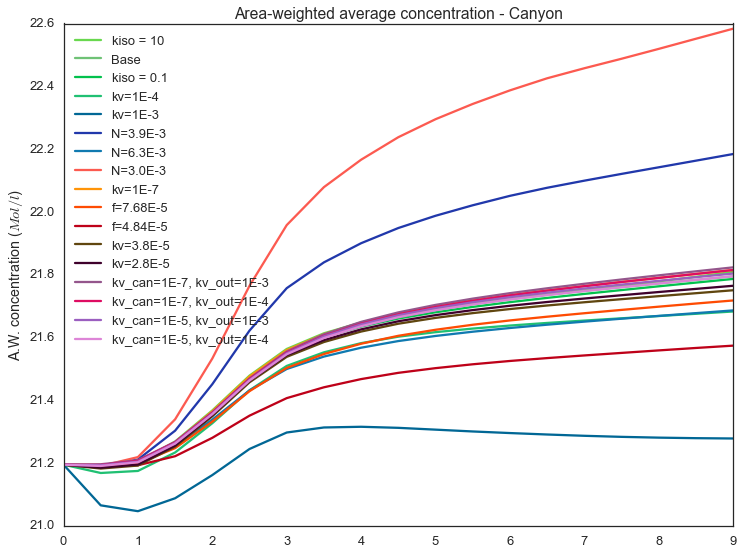

In [10]:
sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## Canyon effect

In [11]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]



In [12]:
df2.columns

Index([u'Unnamed: 0', u'day', u'ConcArea07', u'ConcArea22', u'ConcArea23', u'ConcArea24', u'ConcArea25', u'ConcArea26', u'ConcArea27', u'ConcArea28', u'ConcArea30'], dtype='object')

In [13]:
df.columns


Index([u'Unnamed: 0', u'day', u'ConcArea02', u'ConcArea03', u'ConcArea04', u'ConcArea11', u'ConcArea12', u'ConcArea14', u'ConcArea15', u'ConcArea16', u'ConcArea17', u'ConcArea18', u'ConcArea19', u'ConcArea20', u'ConcArea21', u'ConcArea3D04', u'ConcArea3D05', u'ConcArea3D06', u'ConcArea3D07'], dtype='object')

In [14]:
columns2


['Unnamed: 0',
 'day',
 'ConcArea07',
 'ConcArea22',
 'ConcArea23',
 'ConcArea24',
 'ConcArea25',
 'ConcArea26',
 'ConcArea27',
 'ConcArea28',
 'ConcArea30']

In [15]:
flatArray = np.empty((len(time),len(labelsListCanyon)))

flatArray[:,0] = bottomConcFlat[:,0]
flatArray[:,1] = bottomConcFlat[:,0]
flatArray[:,2] = bottomConcFlat[:,0]
flatArray[:,3] = bottomConcFlat[:,3]
flatArray[:,4] = bottomConcFlat[:,4]
flatArray[:,5] = bottomConcFlat[:,5]
flatArray[:,6] = bottomConcFlat[:,6]
flatArray[:,7] = bottomConcFlat[:,7]
flatArray[:,8] = bottomConcFlat[:,8]
flatArray[:,9] = bottomConcFlat[:,1]
flatArray[:,10] = bottomConcFlat[:,2]
flatArray[:,11] = bottomConcFlat[:,0]
flatArray[:,12] = bottomConcFlat[:,0]
flatArray[:,13] = bottomConcFlat[:,8]
flatArray[:,14] = bottomConcFlat[:,8]
flatArray[:,15] = bottomConcFlat[:,0]
flatArray[:,16] = bottomConcFlat[:,0]

labelsListFlatArray =['Base flat',
                    'Base flat', 
                    'Base flat',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'Base flat',
                    'Base flat',
                    'kv=1E-7',
                    'kv=1E-7',
                    'Base flat',
                    'Base flat',
]

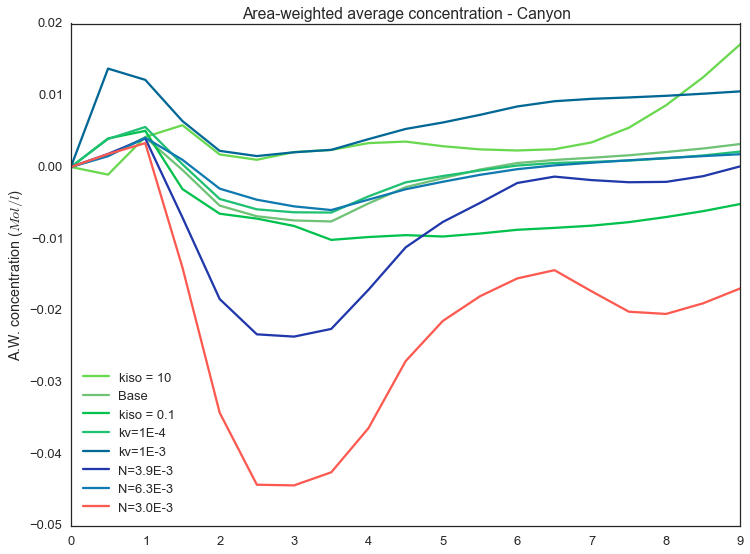

In [29]:
sns.set_context('talk', font_scale=1.0)

sns.set_palette(color_pal)

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in range(len(columns[2:])):
    ax1.plot(times,bottomConcCanyon[:,ii]-flatArray[:,ii],
             label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


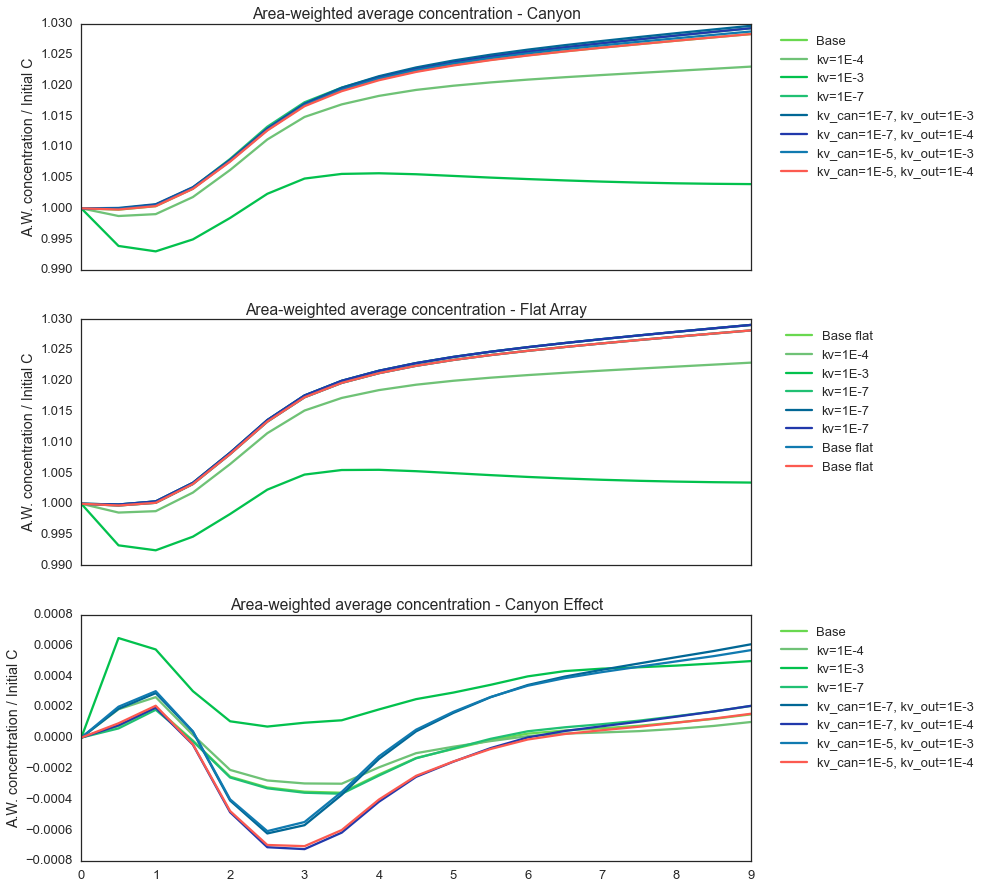

In [30]:

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArray[:,ii]/flatArray[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])
             -(flatArray[:,ii]/flatArray[0,ii]),
             label=labelsListCanyon[ii]
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.35,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


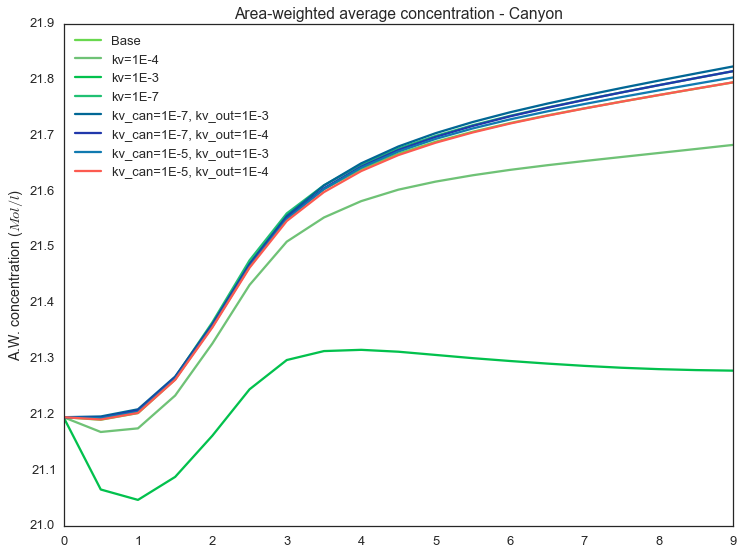

In [35]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,(ax1) = plt.subplots(1, 1, figsize=(12, 9), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii],label=labelsListCanyon[ii])
    
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration ($Mol/l$)')


ax1.legend(loc=0)    
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


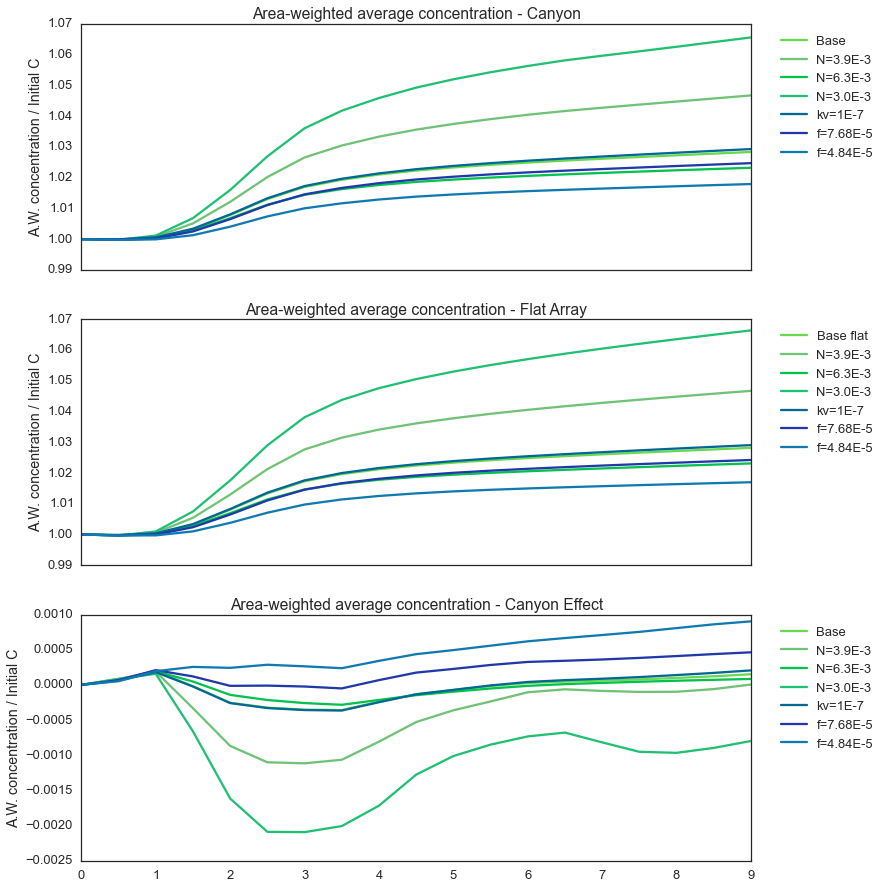

In [36]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,5,6,7,8,9,10]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in diffList:
    ax1.plot(times,bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii],label=labelsListCanyon[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,flatArray[:,ii]/flatArray[0,ii],label=labelsListFlatArray[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,(bottomConcCanyon[:,ii]/bottomConcCanyon[0,ii])
             -(flatArray[:,ii]/flatArray[0,ii]),
             label=labelsListCanyon[ii],
            )
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


## BARKLEY experiments

In [20]:
fileCanyonBarkley = 'results/metricsDataFrames/bottomConcentrationAreaCanyonRunsBarkley.csv'


labelsListCanyonBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

labelsListFlatBar = ['Linear',
                    'Salt',
                    'Oxygen',
                    'Nitrate',
                    'Silicate',
                    'Phosphate',
                    'Nitrous_Acid',
                    'Methane',
]

dfBar = pd.read_csv(fileCanyonBarkley)
columns = dfBar.columns.values.tolist()

#time = dfBar['time']

bottomConcCanyonBar = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcCanyonBar[:,ii] = dfBar[col] 
    ii=ii+1


In [21]:
fileFlatBarkley = 'results/metricsDataFrames/bottomConcentrationAreaFlatRunsBarkley.csv'

dfBarNoC = pd.read_csv(fileFlatBarkley)
columns = dfBarNoC.columns.values.tolist()

#time = dfBarNoC['time']

bottomConcFlatBar = np.empty((len(time),len(columns[2:])))

ii=0

for col in columns[2:]:
    
    bottomConcFlatBar[:,ii] = dfBarNoC[col] 
    ii=ii+1
  

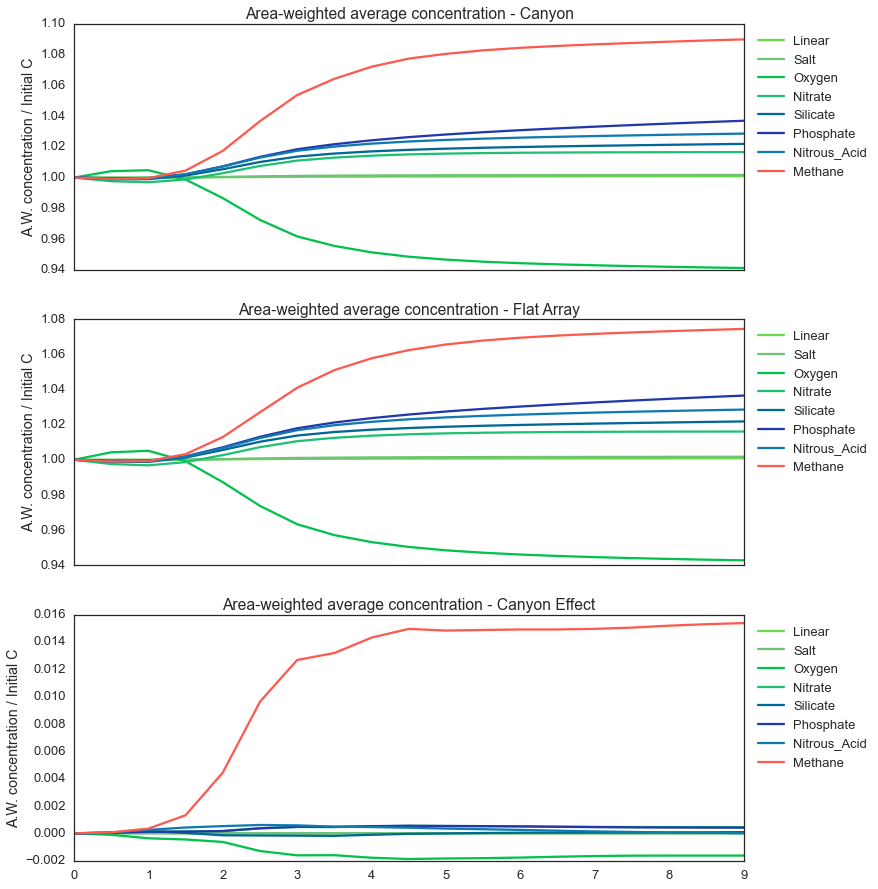

In [37]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)

diffList = [1,3,4,8,13,14,15,16]

times = np.arange(19)/2.0

fig,((ax1),(ax2),(ax3)) = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for ii in range(8):
    ax1.plot(times,bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii],label=labelsListCanyonBar[ii])
    ax1.set_aspect('auto')
    ax1.set_title('Area-weighted average concentration - Canyon ' )
    ax1.set_ylabel('A.W. concentration / Initial C')

    ax2.plot(times,bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii],label=labelsListFlatBar[ii])
    ax2.set_aspect('auto')
    ax2.set_title('Area-weighted average concentration - Flat Array ' )
    ax2.set_ylabel('A.W. concentration / Initial C')

    ax3.plot(times,
             (bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii])
             -(bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')

ax1.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax2.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


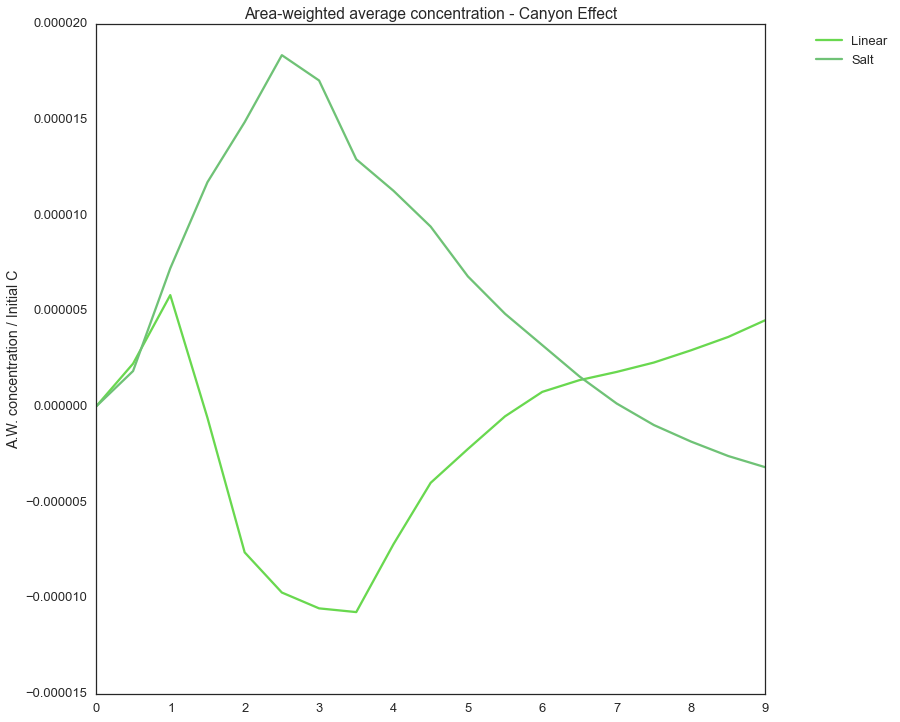

In [45]:
sns.set_palette(color_pal)

sns.set_context('talk', font_scale=1.0)


times = np.arange(19)/2.0

fig,((ax3)) = plt.subplots(1, 1, figsize=(12, 12), sharex=True)

for ii in [0,1]:
    
    ax3.plot(times,
             (bottomConcCanyonBar[:,ii]/bottomConcCanyonBar[0,ii])
             -(bottomConcFlatBar[:,ii]/bottomConcFlatBar[0,ii]),
             label=labelsListCanyonBar[ii]
            )
    
    ax3.set_aspect('auto')
    ax3.set_title('Area-weighted average concentration - Canyon Effect ' )
    ax3.set_ylabel('A.W. concentration / Initial C')
    
ax3.legend(loc ='upper right', bbox_to_anchor=(1.20,1))    

plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')
